In [1]:
import sys
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from _ghmm import GaussianHMM

import warnings
warnings.filterwarnings("ignore", message="Found non-auxiliary vars in guide but not model")
sys.path.append("../../")

In [2]:
# set style of graphs
plt.style.use('ggplot')
from pylab import rcParams
plt.rcParams['figure.dpi'] = 100

In [3]:
df = pd.read_csv('../../stock/AAPL.csv', parse_dates=True, index_col='Date').dropna(how="any")
X_train, X_test = train_test_split(df, test_size=0.1, shuffle=False)

In [4]:
predictor = GaussianHMM(input_dim=4, 
                z_dim=64, 
                emission_dim=64,
                transition_dim=64, 
                variance=0.1,
                pretrained=True
                )

predictor.fit(X_train, 
              batch_size=24, 
              epochs=2,
              patience=2
              )

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1, Loss: -2490.7606996553286
Epoch 2, Loss: -2381.340769443129


In [5]:
y_pred = predictor.predict(X_test)
y_test = (X_test['Close']).values.reshape(-1,1)

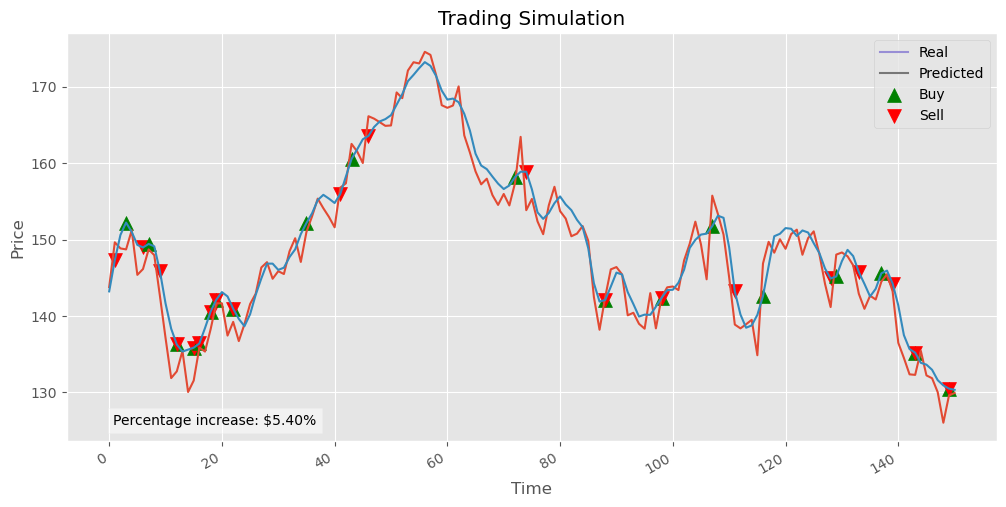

In [6]:
balance, total_profit_loss, percentage_increase, transactions = predictor.trading(predicted=y_pred,
                                                real=y_test,
                                                shares=2,
                                                initial_balance=1000,
                                                stop_loss=0.03,
                                                threshold=0.02,
                                                plot=True
                                                )